In [1]:
from matplotlib import pyplot as plt
import numpy as np
import json
import torch

In [11]:
#filenames = ['data/data_cats_dogs_alldata1.txt', 'data/data_cats_dogs_alldata2.txt', 'data/data_cats_dogs_alldata3.txt']
#filenames = ['log/log_size32_small.txt', 'log/log_size32_medium.txt', 'log/log_size32_large.txt']
#filenames = ['log/log_width8_small.txt', 'log/log_width8_medium.txt', 'log/log_width8_large.txt']
#filenames = ['log/log_width32_small.txt', 'log/log_width32_medium.txt', 'log/log_width32_large.txt']
#filenames = ['log/log_size32_width8_small.txt', 'log/log_size32_width8_medium.txt', 'log/log_size32_width8_large.txt']
#filenames = ['log/3classes_small.txt', 'log/3classes_medium.txt', 'log/3classes_large.txt']
#filenames = ['log/5classes_small.txt', 'log/5classes_medium.txt', 'log/5classes_large.txt']

#filenames = ['log/no_bias_width64_2classes_small.txt', 'log/no_bias_width64_2classes_medium.txt', 'log/no_bias_width64_2classes_large.txt']
#filenames = ['fixed_log/size16_width16_10classes_0.txt', 'fixed_log/size16_width16_10classes_1.txt', 'fixed_log/size16_width16_10classes_2.txt', 'fixed_log/size16_width16_10classes_3.txt']

classes = 10
#filenames = ['imagenet32_v2_log/size32_width16_{}classes_{}.txt'.format(classes, i) for i in range(3)]
#filenames.extend(['imagenet32_v2_log_extratrials/size32_width16_{}classes_{}.txt'.format(classes, i) for i in range(3)])
#fcn_files = ['fcn_imagenet32_log/size32_width4_{}classes_{}.txt'.format(classes, i) for i in range(3)]

filenames = ['imagenet32_log/size32_width32_{}classes_{}.txt'.format(classes, i) for i in range(3)]
filenames.extend(['imagenet32_log_extratrials/size32_width32_{}classes_{}.txt'.format(classes, i) for i in range(3)])
#fcn_files = ['fcn_cifar10_log/size16_width16_{}classes_{}.txt'.format(classes, i) for i in range(3)]

#filenames = ['imagenet32_log/size32_width32_{}classes_{}.txt'.format(classes, i) for i in range(3)]

In [12]:
data_all = []
for filename in filenames:
    f = open(filename)
    data = f.readlines()
    for d in data[1:]:
        split = d.split(' ', 2)
        depth = int(split[0])
        data_vals = split[2]
        data_vals = json.loads(data_vals.replace('\'', '\"'))
        if data_vals['best_train_acc']['train_acc'] > 0.11:
            data_all.append((depth, data_vals))

In [80]:
data_fcn = []
for fcn_file in fcn_files:
    f = open(fcn_file)
    data = f.readlines()
    for d in data[1:]:
        split = d.split(' ', 2)
        depth = int(split[0])
        data_vals = split[2]
        data_vals = json.loads(data_vals.replace('\'', '\"'))
        if data_vals['best_train_acc']['train_acc'] > 0.11:
            data_fcn.append((depth, data_vals))

In [13]:
data_all

[(1,
  {'best_train_acc': {'train_loss': 1.824987179450764,
    'train_acc': 0.36809430255402753,
    'test_loss': 1.8353804349899292,
    'test_acc': 0.386},
   'best_test_acc': {'train_loss': 1.824987179450764,
    'train_acc': 0.36809430255402753,
    'test_loss': 1.8353804349899292,
    'test_acc': 0.386},
   'best_train_loss': {'train_loss': 1.822072332209829,
    'train_acc': 0.3655795677799607,
    'test_loss': 1.8348959684371948,
    'test_acc': 0.378}}),
 (2,
  {'best_train_acc': {'train_loss': 1.3412636170546526,
    'train_acc': 0.5505697445972495,
    'test_loss': 1.5359430313110352,
    'test_acc': 0.48},
   'best_test_acc': {'train_loss': 1.3844012693431382,
    'train_acc': 0.529901768172888,
    'test_loss': 1.5131617784500122,
    'test_acc': 0.514},
   'best_train_loss': {'train_loss': 1.339428074383314,
    'train_acc': 0.5494695481335953,
    'test_loss': 1.513046145439148,
    'test_acc': 0.492}}),
 (3,
  {'best_train_acc': {'train_loss': 0.9047220619066759,
    't

In [16]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 14, 16, 18, 20, 22, 24, 26, 28, 30]

criteria = 'best_train_acc'

metric = 'test_acc'

vals = []
maxs = []
mins = []
sigma = []
valid_depths = []
for d in depths:
    entries = []
    for entry in data_all:
        if d == entry[0]:
            entries.append(entry[1][criteria][metric])
    if len(entries) > 0:
        print(entries)
        vals.append(sum(entries)/float(len(entries)))
        sigma.append(np.std(np.array(entries)))
        maxs.append(max(entries) - vals[-1])
        mins.append(vals[-1] - min(entries))
        valid_depths.append(d)
        


[0.386, 0.36, 0.378]
[0.48, 0.48, 0.498]
[0.494, 0.482, 0.48]
[0.476, 0.436, 0.47]
[0.384, 0.432, 0.434]
[0.432, 0.416, 0.4]
[0.412, 0.424, 0.438]
[0.394, 0.396, 0.4]
[0.39, 0.374, 0.388]


In [83]:
data_fcn

[(1,
  {'best_train_acc': {'train_loss': 0.00851521828442812,
    'train_acc': 1.0,
    'test_loss': 2.3296473026275635,
    'test_acc': 0.5722},
   'best_test_acc': {'train_loss': 0.4296671035575867,
    'train_acc': 0.8844,
    'test_loss': 1.3125818967819214,
    'test_acc': 0.582},
   'best_train_loss': {'train_loss': 0.00851521828442812,
    'train_acc': 1.0,
    'test_loss': 2.3296473026275635,
    'test_acc': 0.5722}}),
 (2,
  {'best_train_acc': {'train_loss': 0.0037878647480905055,
    'train_acc': 1.0,
    'test_loss': 2.19260311126709,
    'test_acc': 0.5923},
   'best_test_acc': {'train_loss': 0.004638350530713797,
    'train_acc': 0.99996,
    'test_loss': 2.1439037322998047,
    'test_acc': 0.5959},
   'best_train_loss': {'train_loss': 0.0037878647480905055,
    'train_acc': 1.0,
    'test_loss': 2.19260311126709,
    'test_acc': 0.5923}}),
 (3,
  {'best_train_acc': {'train_loss': 0.00011008030891302041,
    'train_acc': 1.0,
    'test_loss': 3.6690542697906494,
    'test_

In [9]:
fcn_vals = []
fcn_sigma = []
for d in depths:
    entries = []
    for entry in data_fcn:
        if d == entry[0]:
            entries.append(entry[1][criteria][metric])
    if len(entries) > 0:
        print(entries)
        fcn_vals.append(sum(entries)/float(len(entries)))
        fcn_sigma.append(np.std(np.array(entries)))

NameError: name 'data_fcn' is not defined

In [85]:
vals

[0.5013799999999999,
 0.60774,
 0.6434599999999999,
 0.66308,
 0.6521800000000001,
 0.63452,
 0.6214000000000001,
 0.5885,
 0.56186]

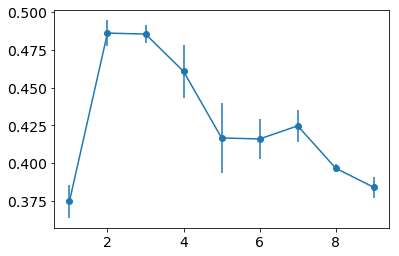

In [17]:
plt.rcParams.update({'font.size': 14})

#plt.plot(valid_depths, vals, marker = 'o')

plt.errorbar(valid_depths, vals, [sigma, sigma], marker = 'o', label='conv')
#plt.errorbar(valid_depths, fcn_vals, [fcn_sigma, fcn_sigma], marker = 'x', color='red', label='fcn')
#plt.plot([valid_depths[0], valid_depths[-1]], [fcn_vals[0], fcn_vals[0]], color='red', linestyle='dashed')

#plt.ylabel(metric)
#plt.ylabel("Train Accuracy")
ymin = 0.48
#ymax = ymin + 0.2
#plt.ylim(ymin, ymax)
#plt.ylim(0.45, 1.0)
#plt.xlabel("Depth")
#plt.xticks(ticks=[0, 3, 6, 9, 12, 15])
#plt.legend()
#plt.ylim(0.3, 1.05)
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

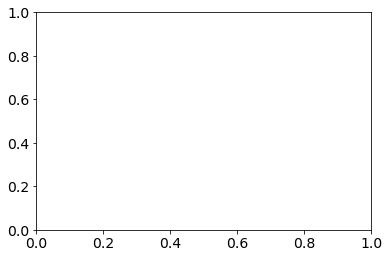

In [23]:
sigma

[0.0018621105287554192,
 0.004624350266212051,
 0.009491198040115188,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

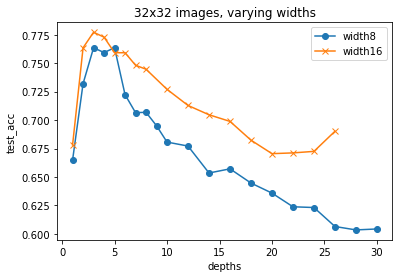

In [45]:
plt.title("32x32 images, varying widths")
plt.plot(depths8, vals8, marker = 'o', label='width8')
plt.plot(depths16, vals16, marker = 'x', label='width16')
#plt.plot(depths, vals32, marker = '^', label='width32')
plt.ylabel(metric)
plt.xlabel("depths")
plt.legend()
plt.show()

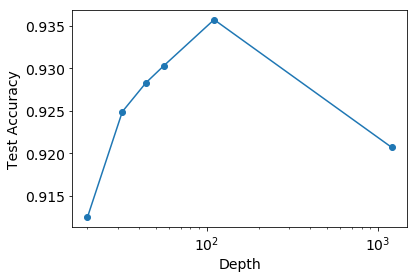

In [90]:
depths = [20, 32, 44, 56, 110, 1202]
accuracies = [8.75, 7.51, 7.17, 6.97, 6.43, 7.93]
plt.xscale("log")
plt.xlabel("Depth")
plt.ylabel("Test Accuracy")
#plt.title("ResNet Test Accuracy on Cifar10")
plt.plot(depths, [1 - a/100 for a in accuracies], marker = 'o')
plt.show()

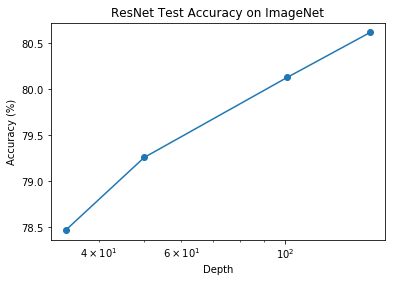

In [43]:
depths = [34, 50, 101, 152]
accuracies = [21.53, 20.74, 19.87, 19.38]
plt.xscale("log")
plt.xlabel("Depth")
plt.ylabel("Accuracy (%)")
plt.title("ResNet Test Accuracy on ImageNet")
plt.plot(depths, [100 - a for a in accuracies], marker = 'o')
plt.show()